In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


In [7]:
data = pd.read_excel("C:/Users/jouin/Downloads/DFF.xlsx",sheet_name=0, parse_dates=['DATE'], index_col='DATE')
print(data.head)


<bound method NDFrame.head of              DFF
DATE            
2020-11-14  0.09
2020-11-15  0.09
2020-11-16  0.09
2020-11-17  0.09
2020-11-18  0.09
...          ...
2025-11-10  3.87
2025-11-11  3.87
2025-11-12  3.87
2025-11-13  3.88
2025-11-14  3.88

[1827 rows x 1 columns]>


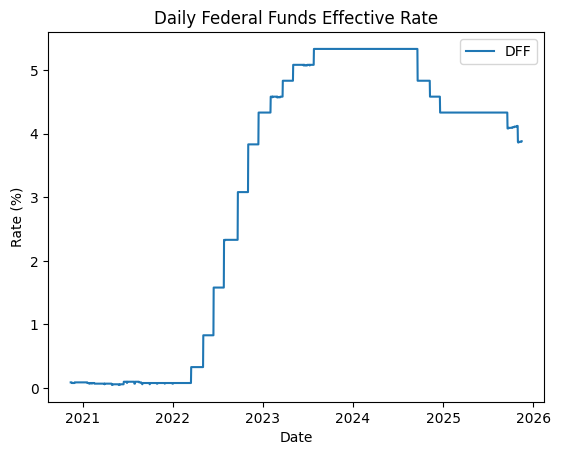

In [8]:
plt.Figure(figsize=(12,6))
plt.plot(data['DFF'],label='DFF')
plt.title('Daily Federal Funds Effective Rate')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()


In [11]:
def adf_test(series):
    #Perform Augmented Dickey-Fuller test and print result
    result=adfuller(series.dropna())
    print('ADF Statistic : {:.4f}'.format(result[0]))
    print('p-value: {:.4f}'.format(result[1]))
    if result[1]<0.05:
        print("Series is Likely Stationary")
        return True
    else:
        print("Series is Likely Non-Stationary")
        return False
print("ADF Test on Raw Series : ")
is_stationary=adf_test(data['DFF'])

ADF Test on Raw Series : 
ADF Statistic : -1.4971
p-value: 0.5350
Series is Likely Non-Stationary


In [13]:
#Apply First Differencing
if not is_stationary:
    data_diff=data['DFF'].diff().dropna()
    print("\nADF Test on First-Differenced Series: ")
    is_stationary_diff=adf_test(data_diff)



ADF Test on First-Differenced Series: 
ADF Statistic : -42.8727
p-value: 0.0000
Series is Likely Stationary


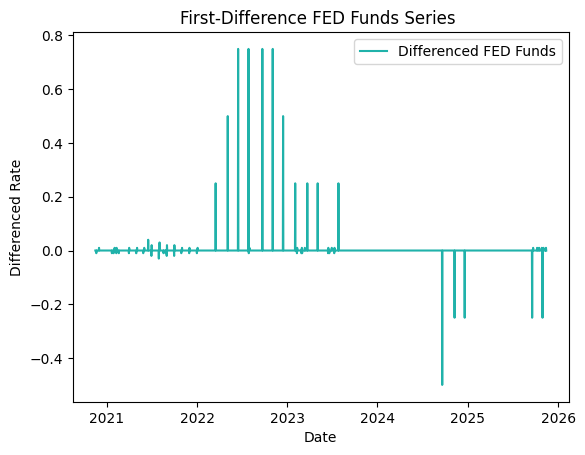

In [ ]:
#Plot Differenced Series
if not is_stationary:
    plt.Figure(figsize=(12,6))
    plt.plot(data_diff,label='Differenced FED Funds',color="lightseagreen")
    plt.title('First-Difference FED Funds Series ')
    plt.xlabel('Date')
    plt.ylabel('Differenced Rate')
    plt.legend()
    plt.show()

In [23]:
#Integrated Orders
if not is_stationary:
    d=1
    D=0
else:
    data_diff=data['DFF']
    d=0
    D=0

print("\nIntegrated Orders for ARIMA/SARIMA: ")
print(f"Non-Seasonal differencing (d) = {d}")
print(f"Seasonal Differencing D = {D} (not needed for Daily FED Funds)")


Integrated Orders for ARIMA/SARIMA: 
Non-Seasonal differencing (d) = 1
Seasonal Differencing D = 0 (not needed for Daily FED Funds)
